# Projet 03 : Préparez des données pour un organisme de santé publique

***
# I) Rappel de l'appel à projet

**Contexte** : L'agence "Santé publique France" a lancé un appel à projets pour rendre les données de santé plus accessibles. L’agence souhaite faire explorer et visualiser des données, pour que ses agents puissent les exploiter.  
**Projet** : Rendre les données de santé plus accessibles. J'ai à ma disposition un jeu de données sur différents produits de consommation issu du site openFoodFacts.  
**Objectif** : concevoir une application userfriendly pour informer les consommateurs.

***
# II) Démarche méthodologique

Ma démarche s’articule autour de 3 phases : 
 - l’élaboration d’un dataset d’étude : filtrage et nettoyage, permettant d’obtenir un dataset d’étude propre pour l’analyse
 - les différents types d’analyse du dataset : univariée pour la compréhension et multivariée pour la problématique, permettant d’avoir des bonnes données d’entrée pour les modèles.
 - la conception de l’application : étude des modèles et création du prototype, permettant de livrer un prototype fonctionnel

## 1) Elaboration du jeu de données d'étude

***
### Structure du jeu de données brut

|Lignes de produit|Colonnes de caractéristique|
|:-:|:-:|
|320 749|162|

***
### Colonnes Vides
Le jeu de données brut présente 320 749 lignes de produit, caractérisées par 162 colonnes. Cela fait énormément de colonnes pour notre étude. J'ai donc d'abord fait un premier filtrage pour supprimer les colonnes vides. Elles représentent 13 % des colonnes.  

|Lignes de produit|Colonnes de caractéristique|
|:-:|:-:|
|320 749|141|

***
Cela fait encore beaucoup de données. Et donc, avant même de commencer à imputer des valeurs dans le jeu de données, j’ai choisi d’effectuer un second filtrage.  
D’abord, j’ai identifié les variables numériques et les variables catégorielles pour effectuer des traitements différents en fonction du type de variable.  
Ensuite, j’ai appliqué 2 approches : 
 - une approche métier : pour identifier la target pour les modèles, supprimer des lignes et supprimer des colonnes non pertinentes pour notre étude
 - une approche technique : utilisation de la corrélation pour supprimer des colonnes

***
### Suppression de lignes sans target
Regardons si nous pouvons supprimer des lignes dans un premier temps. Pour nous aider dans notre réflexion, nous devons revenir à notre objectif principal :
 > Qualifier la qualité des produits pour les consommateurs

Cela peut se faire au moyen d'un modèle de Machine Learning. Pour entraîner ce modèle nous devons avec une valeur cible que l'on appelle la target.  
Dans notre jeu de données, deux variables peuvent remplir ce rôle : 
 - le Nutri-Score `nutrition-score-fr_100g`
 - le Nutri-Grade `nutrition_grade_fr`
 
Sachant cela, il nous est impossible d'exploiter les lignes n'ayant pas ces target de renseignées. Nous allons donc supprimer toutes ces lignes. Elles représentent 31% des lignes.

|Lignes de produit|Colonnes de caractéristique|
|:-:|:-:|
|221 233|141|

***
### Suppression de lignes très peu renseignées
Regardons maintenant si nous pouvons encore supprimer des colonnes.

<font size="4"><center>**Répartition des colonnes en fonction de leur taux de données manquantes**</center></font>
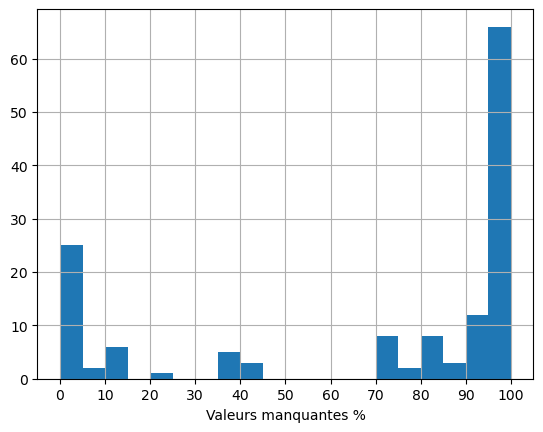

En observant la répartition du nombre de colonnes en fonction de leur taux de valeurs manquantes, on s’aperçoit que :  
 - **15 %** des colonnes ont moins de 5% de valeurs manquantes
 - plus de **40%** des colonnes ont plus de 95% de valeurs manquantes
 
J’ai choisi de garder toutes les colonnes ayant **moins de 99.3%** de valeurs manquantes. Dans les colonnes au-delà de ce taux, je n’ai pas remarqué de données pertinentes à conserver pour notre étude. Ces colonnes supprimées représentent **35%** des colonnes du dataset intermédiaire.

|Lignes de produit|Colonnes de caractéristique|
|:-:|:-:|
|221 233|92|

***
### Sélection de colonnes pertinentes
Regardons maintenant de plus près les données pour voir si on peut tout simplement sélectionner des colonnes pertinentes pour notre étude.

Concernant les **colonnes catégorielles**, Notre étude repose principalement sur des variables numériques. Néanmoins, comme cité plus haut, le Nutri-Grade `nutrition_grade_fr` sera indispensable. Ensuite, nous avons sélectionné le code `code` et le nom du produit `product_name` pour l’identification.

|Lignes de produit|Colonnes da caractéristique|
|:-:|:-:|
|221 233|43|

***
Concernant les **colonnes numériques**, il y a plusieurs cas à distinguer.  
1. Tout d'abord, nous n’aurons pas besoin des dates de création et de modification de la fiche produit. Cela n’influe pas sur la qualité du produit.
2. Ensuite, il existe des variables fortement corrélées entre elles avec un coefficient de plus de 0.98. Ce qui signifie que l’on peut garder une des deux sans impacter le modèle. Nous avons donc fait les suppressions suivantes :
    - la teneur en zinc car corrélée avec la teneur en vitamine B9
    - le Nutri-Score du Royaume-Uni car corrélée avec le Nutri-Score de la France
    - la teneur en sodium car corrélée avec la teneur en sel
3. Quant aux 32 autres colonnes, nous les conservons.

|Lignes de produit|Colonnes de caractéristique|
|:-:|:-:|
|221 233|38|

***
### Nettoyage du jeu de données
Maintenant que nous avons fini de filtrer le jeu de données brut, nous pouvons procéder au nettoyage du dataset à proprement parler.  
Pour ce nettoyage, j’ai effectué plusieurs traitements : 
 - imputation des valeurs manquantes
 - les valeurs aberrantes
 - les lignes dupliquées

***
### Traitement des valeurs manquantes
Concernant les **variables catégorielles**, le nom du produit n’est pas renseigné dans moins de 1% des données. Nous choisissons de le remplacer par la valeur du code. Cela représente 0.9% des données.

Concernant les **variables numériques**, on distingue plusieurs cas : 
 - la valeur énergétique `energy_100g` qui, d’après la formule de calcul, dépend des protéines, des glucides et de la matière grasse. Il se trouve que sur ces lignes, les autres composants ne sont pas renseignés. Donc on peut tout simplement **supprimer** ces lignes.
 - les variables qui, d’après les lois européennes, sont obligatoirement renseignées sur l’étiquette d’un produit. Seuls les matières grasses `fat_100g` et les glucides `carbohydrates_100g` ont des données manquantes. Chacune présente 8% de valeurs manquantes. Nous choisissons de **réajuster** ces valeurs avec la somme de leurs composantes.
 - les variables dites élémentaires ne dépendant d’aucune autre. On fait l’approximation que ces données sont soit absentes, soit réellement à 0. Donc on les renseigne à **zéro**.
 
|Lignes de produit|Colonnes de caractéristique|
|:-:|:-:|
|221 042|38|

***
### Traitement des outliers
Continuons le nettoyage en passant au traitement des outliers.  
Tout d’abord les outliers ayant des valeurs négatives. Les variables concernées sont les suivantes : teneur en cuivre `copper_100g`, fer `iron_100g`, vitamines C `vitamins-c_100g`, matières grasses trans `trans-fat_100g`, sucres `sugars_100g` et protéines `proteins_100g`.
Pour toutes ces valeurs négatives, qui représentent **moins de 1 %** du jeu de données, nous calons les valeurs à 0.


Ensuite, on observe des valeurs maximales supérieures à 100 pour des teneurs pour 100g. Néanmoins, certaines variables telles que les vitamines et les sels minéraux ont des teneurs pouvant être supérieures étant donné que les unités sont en mg et µg. Pour ces dernières, nous laisserons les données ainsi.  
Pour tous les autres constituants dont on est sûr qu’il sont exprimés en g pour 100g, nous allons caler les valeurs maximales à 100. Elles représentent **moins de 1%** des données.  
Regardons plus en détail le cas particulier de la valeur énergétique : 

<font size="4"><center>**Diagramme en boîte de la Valeur énergétique**</center></font>
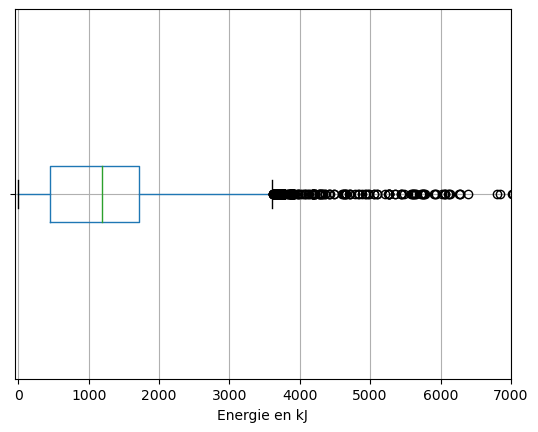

On observe un maximum à **3.25 millions de kJ**. On peut trouver que la valeur énergétique maximale pour un produit est de **3700 kJ**. J’ai donc réajusté **moins de 1%** des données à cette valeur.

***
### Traitement des lignes dupliquées
Maintenant que nous avons effectué toutes les corrections possibles sur les données, nous allons finir en traitant les lignes dupliquées.

Pour ce faire, nous prenons en compte uniquement les valeurs numériques que nous avons gardé. En effet, il y a des doublons avec les mêmes constituants, mais un nom de produit différent. Ces lignes représentent 18.5% du jeu de données intermédiaire.

|Lignes de produit|Colonnes de caractéristique|
|:-:|:-:|
|180 184|38|

***
### Présentation du jeu de données d'étude
Il présente une liste de 180 184 produits caractérisés par 38 colonnes.  
On peut distinguer 4 catégories de colonne : 
- **Identification** : (2) le code et le nom du produit
- **Composition** : (3) nombre d’additifs, nombre d’ingrédients issus d’huile de palme…
- **Nutrition** : (31) la teneur en différents nutriments pour 100g, comme par exemple les sucres, les protéines, les matières grasses…
- **Score** : (2) le Nutri-Score et le Nutri-Grade

## 2) Analyse du jeu de données

### Compréhension du jeu de données

Maintenant que nous avons bien en tête la structure du jeu de données d’étude, et pour une meilleure compréhension, nous allons faire une analyse univariée du jeu de données.  
J'ai choisi d'illustrer uniquement les variables notables :
 - le Nutri-Score
 - la Valeur énergétique
 - la Teneur en Glucides
 - le Nutri-Grade

<font size="4"><center>**Répartition par Nutri-Score**</center></font>
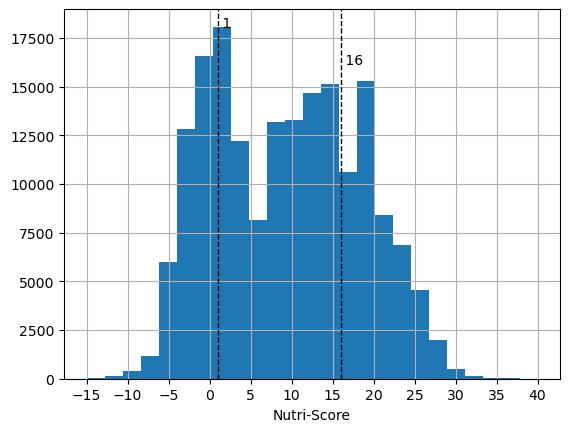

50 % des produits ont un Nutri-Score compris entre 1 et 16.  
Les produits ayant un Nutri-Score inférieur à -5 et qui sont donc considérés comme bons représentent 4% de la population.  
De l’autre côté, les produits ayant un Nutri-Score supérieur à 25 et qui sont donc considérés comme mauvais représentent également 4% de la population.  
Et on observe une moyenne de Nutri-Score de 9.

<font size="4"><center>**Répartition par Valeur énergétique**</center></font>
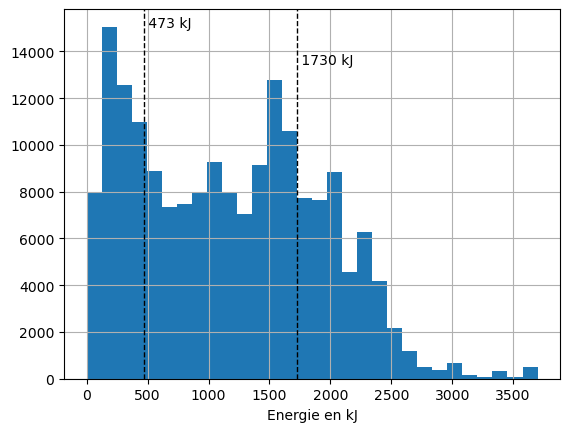

50 % des produits ont une valeur énergétique comprise entre 473 et 1730 kJ.  
Les produits ayant une valeur énergétique inférieure à 250 kJ représentent 3% de la population.  
De l’autre côté, les produits ayant une valeur énergétique supérieure à 2500 kJ représentent 13% de la population.  
Et on observe une moyenne de 1172 kJ.

<font size="4"><center>**Répartition par Teneur en Glucides**</center></font>
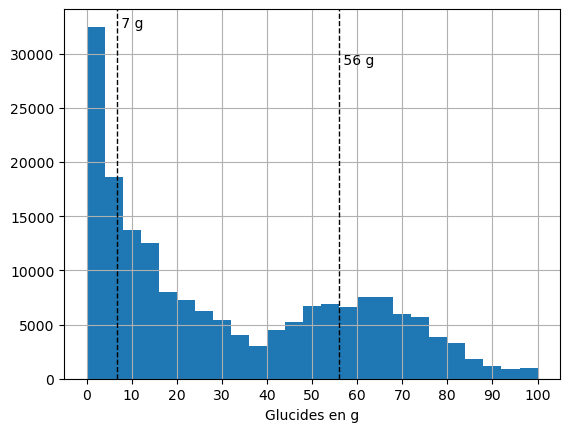

50 % des produits ont une teneur en glucides comprise entre 7 et 56 kJ.  
Le pic à gauche montre les produits ayant une teneur en glucides inférieure à 4g et représentent 18% de la population.  
De l’autre côté, les produits ayant une teneur en glucides supérieure à 80g représentent 5% de la population.  
La forme particulière de cette répartition montre également une forte proportion de produits ayant une teneur en glucides comprise entre 40 et 80g. Cette proportion est de l’ordre de 34% de la population.  
Et on observe une moyenne de 31g.

<font size="4"><center>**Répartition du Nutri-Grade**</center></font>
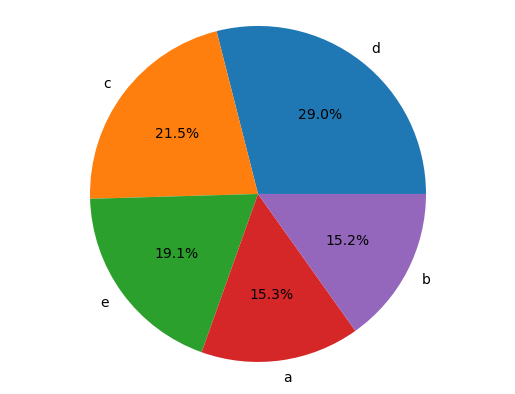

On constate que les principales valeurs de Nutri-Grade sont C, D et E, càd les plus mauvaises notes de produits. Elles représentent 70% des produits.

***
### Analyse de la problématique

Rappelons notre problématique : 
 > Créer une application pour qualifier la qualité des produits
 
Deux questions principales découlent de cette problématique : 
 - Quel modèle performant utiliser ?
 - Quel design pour notre application ?
 
Nous pouvons répondre à ces questions en étudiant différents aspects : 
 - la sélection des variables et plus précisément la réduction du nombre de colonne d’une part et le choix des variables pertinentes d’autre part
 - le choix du modèle (Régression Linéaire ou KNN)
 - la performance du modèle (paramètre du modèle et données d’entrée)

***
Tout d'abord regardons la corrélation entre le Nutri-Score et le Nutri-Grade. Pour ce faire, nous allons utiliser la méthode ANOVA. Cette méthode permet de mesurer la corrélation entre une variable quantitative ou numérique et une variable qualitative ou catégorielle.

<font size="4"><center>**ANOVA entre le Nutri-Score et le Nutri-Grade**</center></font>
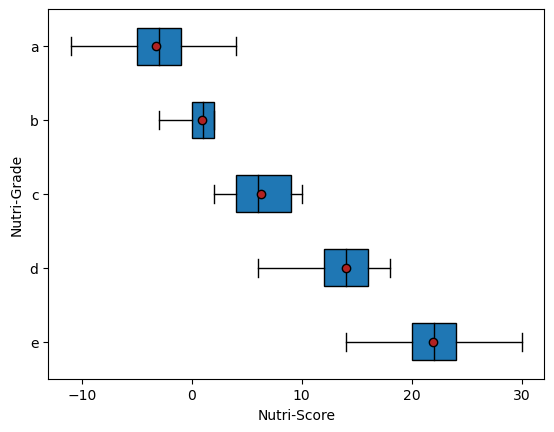

Il en résulte un coefficient de corrélation de 0.93 montrant une forte corrélation entre les deux. Et effectivement, il existe une table de correspondance entre le Nutri-Score et le Nutri-Grade. Cela signifie que l’on peut utiliser ces 2 variables pour nos modèles.  
A tester en fonction des performances.

***
<font size="4"><center>**HeatMap de corrélation entre les variables**</center></font>
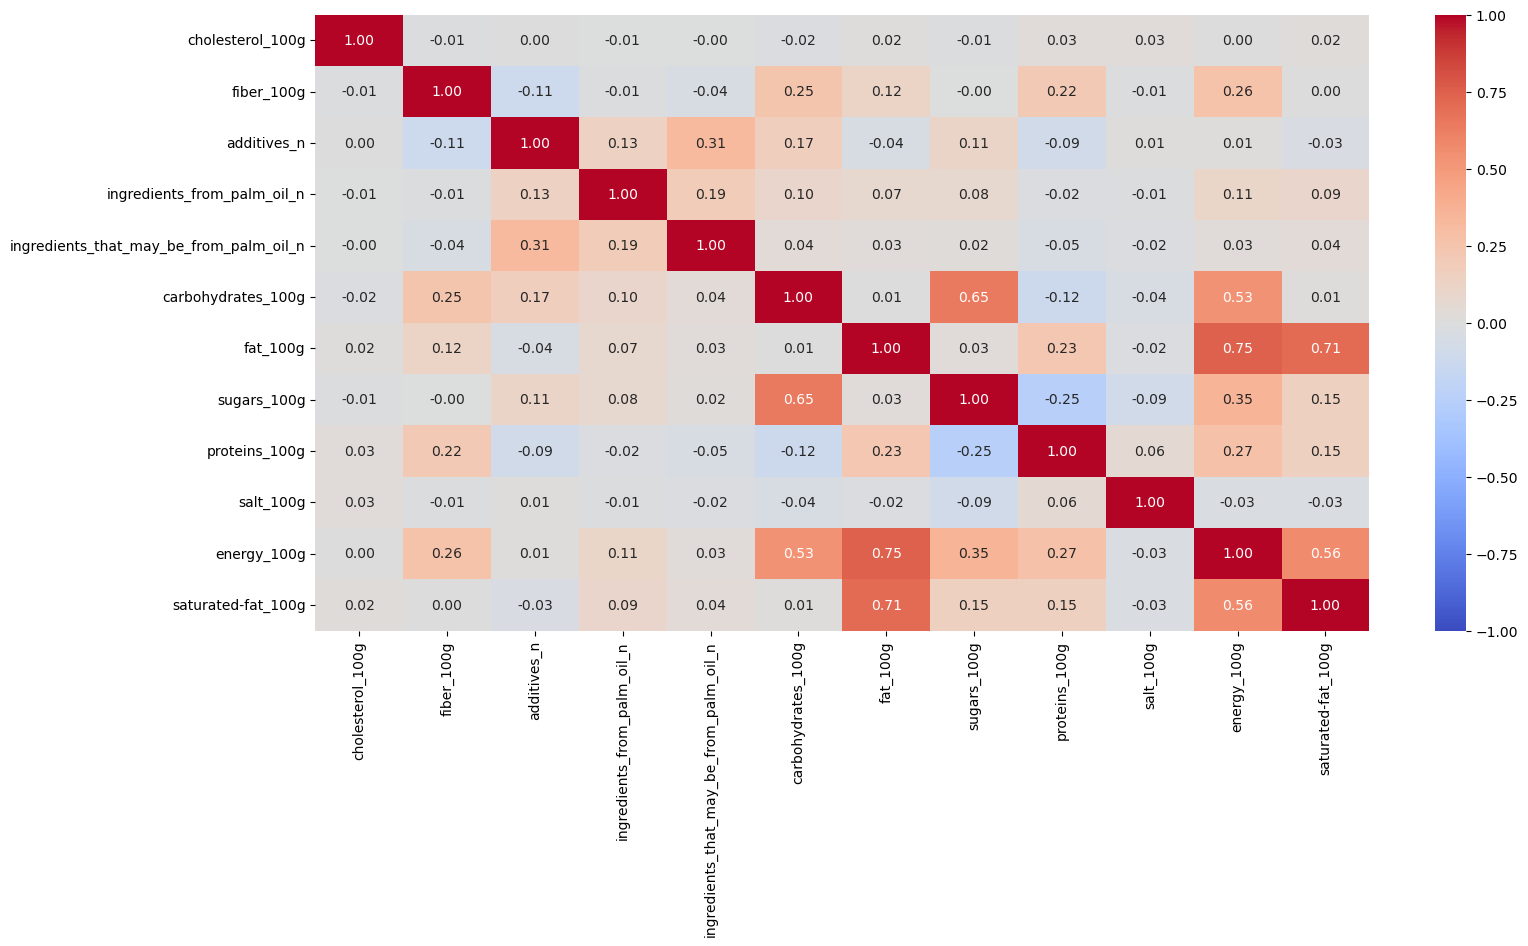

On peut distinguer plusieurs corrélations : 
 - matières grasses et matières grasses saturées (puisque le second est un des composants du premier) 0.71
 - glucides et sucres (puisque le second est un des composants du premier) 0.65
 - valeur énergétique avec dans l'ordre d'importance matières grasses, matières grasses saturées, glucides, sucres et protéines (puisque que la valeur énergétique est calculée à partir des teneur en protéines, glucides et matières grasses)
 
Il y a certes des corrélations fortes mais pas assez pour supprimer directement une des valeurs. Nous allons donc toutes les conserver dans un premier temps. Puis au moment de tester les performances de nos modèles, nous testerons ces variables indépendamment.

***
Regardons maintenant les plus fortes corrélations entre le Nutri-Score et d’autres variables. Voici les 2 variables les plus corrélées avec le Nutri-Score.


<font size="4"><center>Corrélation entre Nutri-Score et Valeur énergétique</center></font>|<font size="4"><center>Corrélation entre Nutri-Score et Matières Grasses Saturées</center></font>
:-|:-
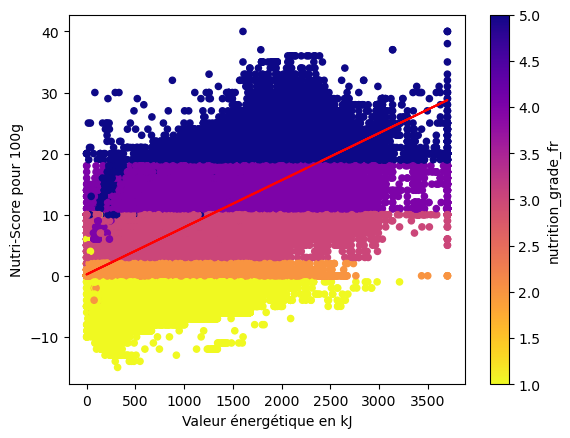|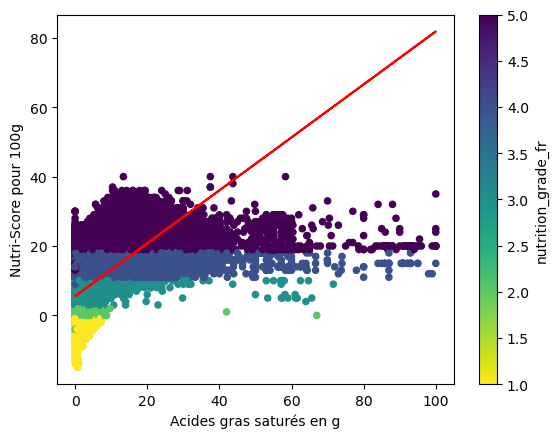
<font size="3">On observe une tendance de corrélation puisque le coefficient est de 0.65.</font>|<font size="3">On observe également une tendance de corrélation puisque le coefficient est de 0.63.</font>

Nous ne pouvons donc pas intuitivement écarter certaines variables car les corrélations ne sont pas assez marquées pour faire des approximations. Nous allons devoir utiliser une autre méthode pour réduire le nombre de colonnes.

***
Afin de réduire le nombre de colonnes, utilisons la méthode de l’Analyse par Composantes Principales **ACP**. Cette analyse permet d’établir des variables synthétiques combinant un certain nombre de variables d’entrée.

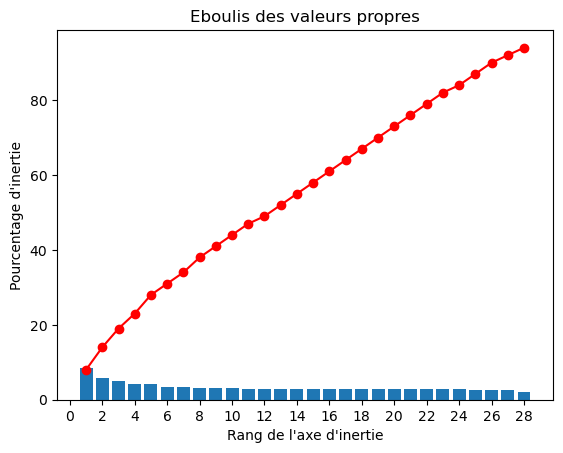

Comme on peut le voir sur la représentation de l’éboulis des valeurs propres, il nous faut 28 composantes pour regrouper 95% de l’inertie des variables d’entrée. L'ACP n'est donc pas applicable en l'état puisque le nombre de composantes est trop important. Nous allons donc passer à l’approche par coefficient.

<font size="4"><center>HeatMap partielle de corrélation entre les variables et les composantes principales</center></font>
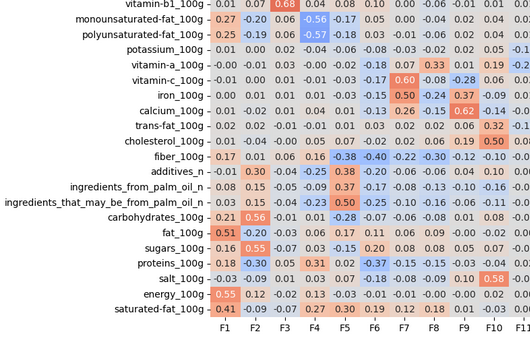

Chaque coefficient représente la part de la variable dans la composante. En relavant les variables qui inteviennent d'une manière importante (càd > 0.65) dans les composantes, on obtient une liste de 8 variables : 
 - Vitamines B1
 - Vitamines B6
 - Vitamines B9
 - Teneur en Cuivre
 - Teneur en Potassium
 - Alcool
 - Nombre d'ingrédients issus d’huile de palme
 
Cependant, en se fiant uniquement à cette analyse, nous perdons des informations importantes.

En plus des variables issues de l’ACP, une **approche métier** nous permet de conclure les faits suivants : 
 - l’utilisateur aura à sa disposition les **variables obligatoires sur l’étiquette**. Mais nous avons vu plus haut que certaines étaient corrélées entre elles. Nous ferons des tests en conséquence.
 - si un certain nombre de vitamines sont présentes, l’utilisateur sera étonné de ne voir que celles-ci. Nous ferons également des tests avec **l’ensemble des vitamines**.
 - il y a également des variables que je trouve pertinentes. J’envisage de faire des tests sur les performances avec ces **variables supplémentaires** afin de décider si je dois les conserver ou non

|Variables issues de l’ACP|Données obligatoires sur une étiquette|Autres vitamines|Variables pertinentes ?|
|-|-|-|-|
|Vitamines B1|Valeur énergétique|Vitamines A|Fibres|
|Vitamines B6|Matières Grasses|Vitamines C|Part de fruits/légumes/noix|
|Vitamines B9|Matières Grasses saturées|Vitamines D|Nombre d'additifs|
|Teneur en Cuivre|Teneur en Glucides|Vitamines B2||
|Teneur en Potassium|Teneur en Sucres|Vitamines B12||
|Alcool|Valeur énergétique|Vitamines PP||
|Nb ingr. huile de palme|teneur en Sel|Acide Pantothénique (B5)||

Maintenant que nous avons sélectionné nos variables d'étude, nous pouvons passer à la conception de l'application.

## 3) Conception de l'application

Avant de commencer notre étude, faisons un état bilan de nos données.  
Notre dataset présente 180 184 lignes pour 38 colonnes. Et suite à notre sélection nous avons maintenant une liste de 26 variables.  
Avec ces données d’entrée, nous allons pouvoir étudier quelques modèles (Régression Linéaire et KNN) avec les différentes targets que nous avons. Nous allons également faire des tests de performances par restriction de variables.

Voici les résultats comparatifs entre les 2 algorithmes en fonction des variables utilisées :

||Régression Linéaire|K plus proches voisins (KNN)|
|-|-|-|
|Ensemble des 26 variables|71.4 %|75.0 %|
|Sans les Additifs|70.4 %|75.7 %|
|Sans les Glucides|70.3 %|77.1 %|
|Sans les Matières Grasses|69.6 %|78.5 %|

Globalement, on voit que le KNN est plus performant que la Régression Linéaire.  
Les tests de performances par restriction de variables ont eu un bénéfice sur le KNN mais a eu l’effet inverse pour la Régression Linéaire.  
J’ai donc choisi le modèle du KNN avec une liste de 21 variables.

<font size="4"><center>Taux de prédiction du KNN en fonction du paramètre k</center></font>
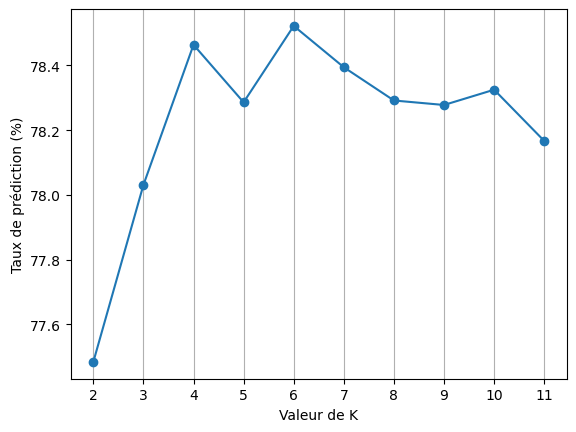

On peut voir que l'on observe un optimum à k=6. C'est la valeur que nous avons utilisée pour notre modèle final.

Et enfin, voici la liste des variables que nous avons utilisées pour notre modèle et pour notre application finale.

|Liste des variables||||
|-|-|-|-|
|Valeur énergétique|Cuivre|Vitamines A|Vitamines B9|
|Matières grasse saturées|Potassium|Vitamines C|Vitamines B12|
|Sucres|Alcool|Vitamines D|Vitamines PP|
|Protéines|Nb ingr. huile de palme|Vitamines B1|Acide Pantothénique (B5)|
|Sel|Part de fruit/légume/noix|Vitamines B2||
||Fibres|Vitamines B6||


***
# III Présentation du prototype d'application

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import ipywidgets as widgets
from ipywidgets import interact, Button, GridspecLayout, Layout, FloatSlider, jslink, interactive, IntProgress
data = pd.read_csv("input_knn.csv", encoding='utf-8', sep='\t', index_col=0)

In [2]:
col_num_wo_nutrigrade = [x for x in data.columns if x != "nutrition_grade_fr"]
X = data[col_num_wo_nutrigrade]
y_knn = data["nutrition_grade_fr"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y_knn, test_size=0.2, random_state=101)
model = neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance', p=1, leaf_size=20, metric='minkowski')
model.fit(X_train[col_num_wo_nutrigrade], y_train)
# print("Performance de prédiction du KNN :", round(model.score(X_test[col_num_wo_nutrigrade], y_test)*100, 1), "%")

KNeighborsClassifier(leaf_size=20, n_neighbors=6, p=1, weights='distance')

In [4]:
style = {'description_width': 'initial'}
layout=Layout(width='70%', height='auto')

@interact
def compute_score(
    vit_a=FloatSlider(description="Vitamines A", min=0, max=1000, value=0, style=style, layout=layout),
    vit_c=FloatSlider(description="Vitamines C", min=0, max=1000, value=0, style=style, layout=layout),
    vit_d=FloatSlider(description="Vitamines D", min=0, max=1000, value=0, style=style, layout=layout),
    vit_pp=FloatSlider(description="Vitamines PP", min=0, max=1000, value=0, style=style, layout=layout),
    vit_b1=FloatSlider(description="Vitamines B1", min=0, max=1000, value=0, style=style, layout=layout),
    vit_b2=FloatSlider(description="Vitamines B2", min=0, max=1000, value=0, style=style, layout=layout),
    vit_b6=FloatSlider(description="Vitamines B6", min=0, max=1000, value=0, style=style, layout=layout),
    vit_b9=FloatSlider(description="Vitamines B9", min=0, max=1000, value=0, style=style, layout=layout),
    vit_b12=FloatSlider(description="Vitamines B12", min=0, max=1000, value=0, style=style, layout=layout),
    ac_pantho=FloatSlider(description="Acide Pantothénique (B5)", min=0, max=1000, value=0, style=style, layout=layout),
    copper=FloatSlider(description="Cuivre", min=0, max=1000, value=0, style=style, layout=layout),
    potassium=FloatSlider(description="Potassium", min=0, max=1000, value=0, style=style, layout=layout),
    alcohol=FloatSlider(description="Alcool", min=0, max=100, value=0, style=style, layout=layout),
    nb_huile_palm=FloatSlider(description="Nb. ingr. huile de palme", min=0, max=10, value=0, style=style, layout=layout),
    energy=FloatSlider(description="Valeur énergétique", min=0, max=3700, value=0, style=style, layout=layout),
    sat_fat=FloatSlider(description="Matières grasses saturées", min=0, max=100, value=0, style=style, layout=layout),
    sugars=FloatSlider(description="Sucres", min=0, max=100, value=0, style=style, layout=layout),
    proteins=FloatSlider(description="Protéines", min=0, max=100, value=0, style=style, layout=layout),
    salt=FloatSlider(description="Sel", min=0, max=100, value=0, style=style, layout=layout),
    fiber=FloatSlider(description="Fibres", min=0, max=100, value=0, style=style, layout=layout),
    fruits_leg=FloatSlider(description="Part de fruits/légumes/noix", min=0, max=100, value=0, style=style, layout=layout)
):
    data_to_predict = {}
    for col in col_num_wo_nutrigrade:
        data_to_predict[col] = 0
    data_to_predict['energy_100g'] = energy
    data_to_predict['saturated-fat_100g'] = sat_fat
    data_to_predict['sugars_100g'] = sugars
    data_to_predict['proteins_100g'] = proteins
    data_to_predict['salt_100g'] = salt
    data_to_predict['copper_100g'] = copper
    data_to_predict['potassium_100g'] = potassium
    data_to_predict['alcohol_100g'] = alcohol
    data_to_predict['ingredients_from_palm_oil_n'] = nb_huile_palm
    data_to_predict['fiber_100g'] = fiber
    data_to_predict['fruits-vegetables-nuts_100g'] = fruits_leg
    data_to_predict['vitamin-a_100g'] = vit_a
    data_to_predict['vitamin-c_100g'] = vit_c
    data_to_predict['vitamin-d_100g'] = vit_d
    data_to_predict['vitamin-b1_100g'] = vit_b1
    data_to_predict['vitamin-b2_100g'] = vit_b2
    data_to_predict['vitamin-b6_100g'] = vit_b6
    data_to_predict['vitamin-b9_100g'] = vit_b9
    data_to_predict['vitamin-b12_100g'] = vit_b12
    data_to_predict['vitamin-pp_100g'] = vit_pp
    data_to_predict['pantothenic-acid_100g'] = ac_pantho
    df = pd.DataFrame([data_to_predict])
    pred = model.predict(df)
    
    if pred[0] <= 1:
        color = 'green'
    elif pred[0] == 2:
        color = 'lightgreen'
    elif pred[0] == 3:
        color = 'yellow'
    elif pred[0] == 4:
        color = 'orange'
    elif pred[0] == 5:
        color = 'red'
            
    # print(pred)
    result = IntProgress(
        value=pred[0],
        min=0,
        max=5,
        step=1,
        description='Score:',
        bar_style='info',
        style={'bar_color': color},
        orientation='horizontal'
    )
    return result

interactive(children=(FloatSlider(value=0.0, description='Vitamines A', layout=Layout(height='auto', width='70…

Ce prototype présente la liste des différentes variables. Pour chacune, un curseur permet de renseigner une valeur. Le score se calcule en temps réel. Il est matérialisé par la barre de score en bas : 
 - plus elle se remplie, plus le score est mauvais
 - le code couleur est similaire à celui du Nutri-Grade pour donner l'information directement

***
# IV Synthèse de l'analyse de données

D'une part, il y a matière à améliorer les performances du modèle car un taux de prédiction de 78% est assez moyen.

Après quelques recherches, j’ai pu voir que le Nutri-Score était calculé en fonction de des variables suivantes :
- Valeur énergétique
- Sucres
- Matières grasses saturées
- Sel
- Protéines
- Fibres
- Part de fruits/légumes/noix

Mais surtout que le calcul dépend des catégories des produits suivantes :
- Cas général
- Matières grasses ajoutées
- Boissons
- Fromages

Or, dans notre jeu de données, cette catégorie est localisée dans les colonnes Groupes PNNS dont il manque plus de 70% des données. Il faudrait donc voir pour renseigner ces informations.

Par ailleurs, si j’avais eu le temps, j'aurais testé d’autres algorithmes.

D’autre part, je pense que l’on peut améliorer l’ergonomie en faisant notamment appel à un développeur web.  
Concernant les fonctionnalités, nous pouvons ajouter : 
 - une option pour spécifier le régime de l’utilisateur (allergènes, sportifs, sans gluten…)
 - un affichage de suggestion de produits alternatifs si la note du produit est faible
 
Par ailleurs, la seule liste de variables présentes dans le Nutri-Score ne suffit pas à qualifier un produit correctement. Les utilisateurs sont à la recherche d'informations telles que les additifs, l'empreinte carbone, les produits bio, etc.

Il y a donc bien matière à améliorer cette application.